# Kernels en SVM


In [3]:
import numpy as np

import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [4]:
def load_dataset_disks(size, seed=39):
    def get_sample_disk(from_, to, size):
        length = np.random.uniform(from_, to, size)
        angle = np.pi * np.random.uniform(0, 2, size)
        x = length * np.cos(angle)
        y = length * np.sin(angle)
        return np.array(list(zip(x, y)))

    np.random.seed(seed)
    size1 = int(size / 2)
    size2 = size - size1
    X = np.concatenate((get_sample_disk(0, 1, size1),
                       get_sample_disk(1, 2, size2)))
    Y = np.concatenate((np.ones(size1), -np.ones(size2)))
    return X, Y


def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    # ax = plt.axes()
    # ax.set_aspect("equal", adjustable="datalim")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)  # OrRd_r)
    # plt.contourf(xx, yy, Z, colors = ["red","royalblue"], alpha=0.2)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)

# SVMs (kernels)


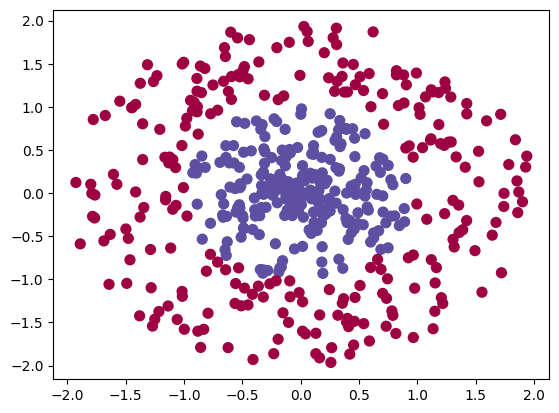

In [5]:
X, Y = load_dataset_disks(500)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral)

### Probemos utilizar algunos kerneles


#### Sigmoide

$$tanh(\gamma \cdot \langle x \;,\; x^´\rangle + r)$$


In [6]:
clf = sklearn.svm.SVC(kernel="sigmoid", gamma="auto")
clf.fit(X, Y)

SVC(gamma='auto', kernel='sigmoid')

Accuracy: 65 


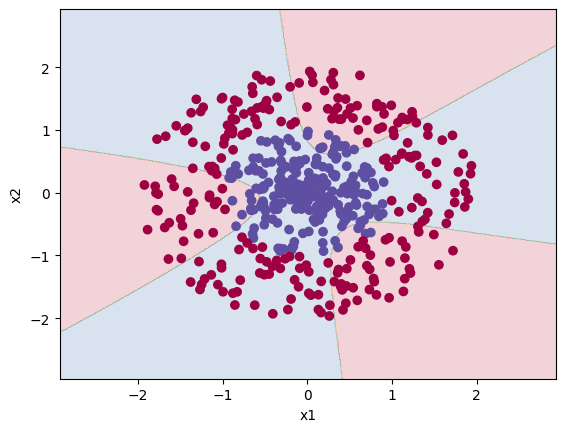

In [7]:
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

#### RBF

$$exp(-\gamma \cdot {\| x \; - \; x^´\|}²)$$


In [8]:
clf = sklearn.svm.SVC(kernel="rbf", gamma="auto")
clf.fit(X, Y)

SVC(gamma='auto')

Accuracy: 99 


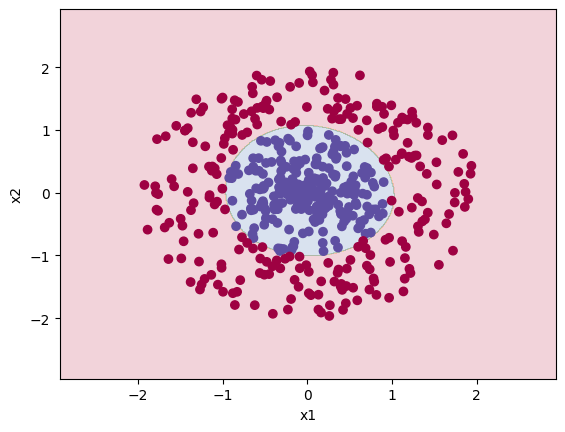

In [9]:
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

#### Polinomial

$$(\gamma \cdot \langle x \;,\; x^´\rangle + r)^d$$


In [10]:
clf = sklearn.svm.SVC(kernel="poly", degree=6, gamma="auto")
clf.fit(X, Y)

SVC(degree=6, gamma='auto', kernel='poly')

Accuracy: 95 


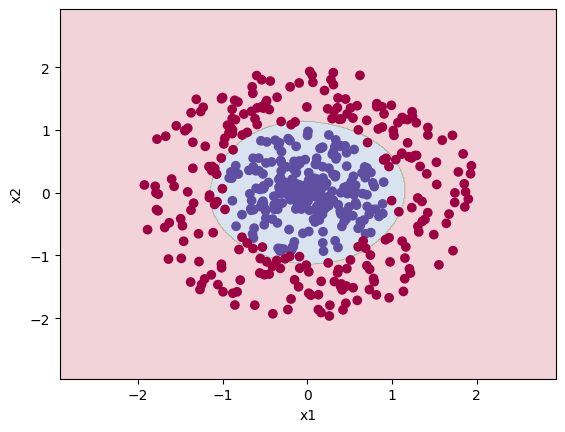

In [11]:
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

Un ejemplo interesante de uso de SVM: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification


## Usemos conjunto de entrenamiento y de prueba


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Dividimos el conjunto de datos


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

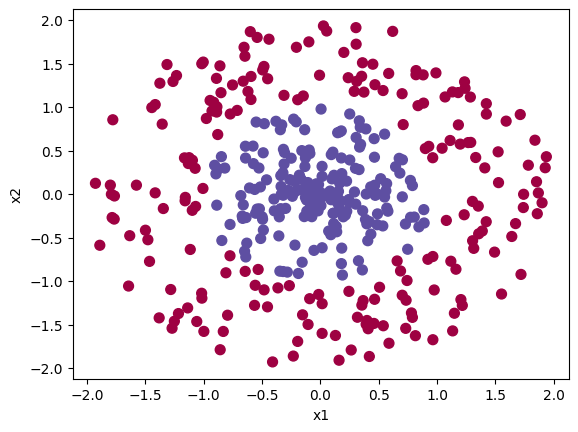

In [14]:
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, s=50, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

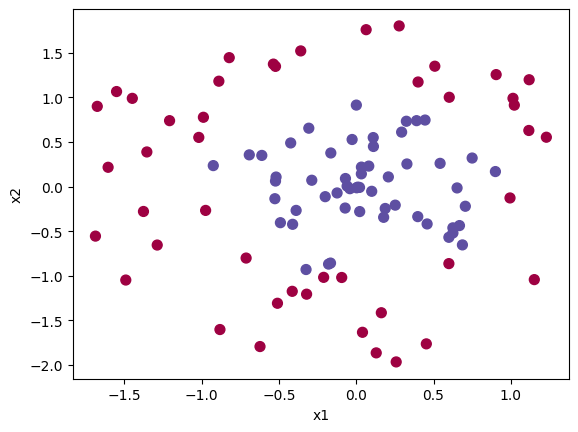

In [15]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Reporte de clasificación usando el conjunto de datos de prueba


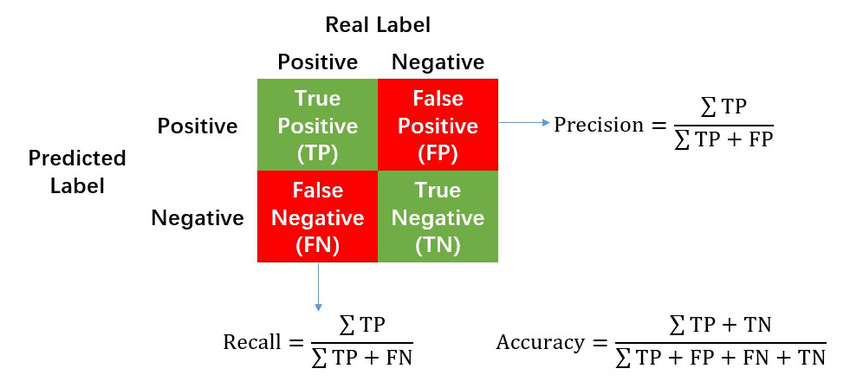

In [16]:
from IPython.display import Image
Image('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Te%C3%B3rico/images/confusion_matrix.png', width=500)

              precision    recall  f1-score   support

        -1.0       0.62      0.33      0.43        45
         1.0       0.61      0.84      0.70        55

    accuracy                           0.61       100
   macro avg       0.62      0.58      0.57       100
weighted avg       0.61      0.61      0.58       100



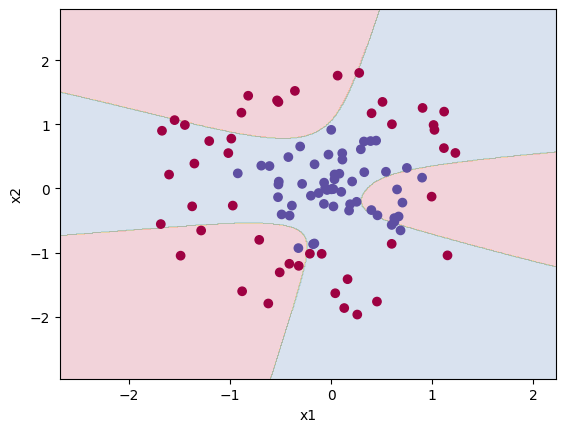

In [17]:
clf = sklearn.svm.SVC(kernel="sigmoid", gamma="auto").fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

plot_decision_boundary(lambda x: clf.predict(x), X_test.T, y_test.T)

[LibSVM]              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99        45
         1.0       0.98      1.00      0.99        55

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



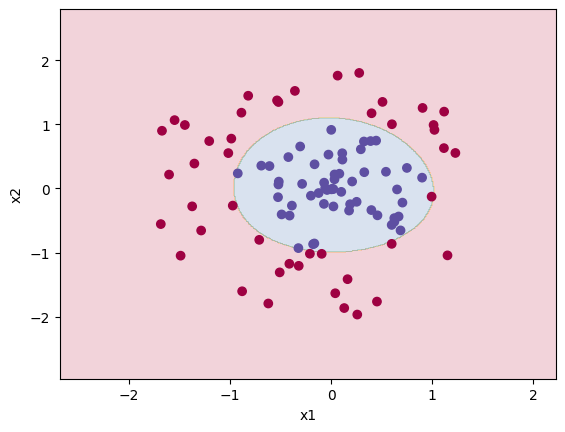

In [18]:
clf = sklearn.svm.SVC(kernel="rbf", gamma="auto",
                      verbose=2).fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

plot_decision_boundary(lambda x: clf.predict(x), X_test.T, y_test.T)

## Referencias:

- Scikit: [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#support-vector-machines)
